# Sentiment and Time Series Analysis of Software Products of Amazon 

Importing All the Libraries Required


In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # Asign correlation between the features
import scipy.sparse                                                 #
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds                                #
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data                                 # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

Parsing the JSON.GZ file to Python to get a Pandas Dataframe To Work On

In [12]:
def parse(path):                   # Creating Function
  g = gzip.open(path, 'rb')        # opens the compressed format file
  for l in g:
    yield eval(l)                  # Returns eval(l)

def getDF(path):                   # Creating Function getDF
  i = 0
  df = {}                          # Creating empty dictionary
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')         # .from_dict creates DataFrame object from dictionary by columns or by index allowing dtype specification.
false=False
true=True
#importing the metadata of software products
df = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\meta_Software.json.gz')
# importing the software reviews of metadata
df1 = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\SoftwareReviews.json.gz')


Checking the shape and starting entries of metadata

In [13]:
df.shape

(26790, 19)

In [14]:
df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],,HOLT. RINEHART AND WINSTON,[],"25,550 in Software (",[],Software,,</div>,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120,[],[],NaN
1,[],,"[, <b>Latin rhythms that will get your kids si...",,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill,[],"15,792 in Software (",[],Software,,</div>,,0071480935,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,[],,[<b>Connect is the only integrated learning sy...,,Connect with LearnSmart Access Card for Microb...,[],,McGraw-Hill Science/Engineering/Math,[],"16,900 in Software (",[],Software,,</div>,,007329506X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,[],,LearnSmart Standalone Access Card for Prescott...,[],,McGraw-Hill Education,[],"12,986 in Software (",[],Software,,</div>,,0073513458,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[<i>Anatomy &amp; Physiology Revealed Cat</i> ...,,Anatomy &amp; Physiology Revealed Student Acce...,"[0323394612, 0323227937, 1118527488]",,McGraw-Hill Education,[],"14,861 in Software (",[],Software,,</div>,$4.83,0073525758,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


Checking the shape and entries of Review Data

In [15]:
df1.shape

(459436, 12)

In [16]:
df1.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


Making New Dataframe with the required features of the SOftware Metadata dataset

In [17]:
data2 = df[['asin', 'title', 'category', 'price', 'brand']]
data2.head()

,asin,title,category,price,brand
0,0030672120,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],.a-box-inner{background-color:#fff}#alohaBuyBo...,HOLT. RINEHART AND WINSTON
1,0071480935,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill
2,007329506X,Connect with LearnSmart Access Card for Microb...,[],,McGraw-Hill Science/Engineering/Math
3,0073513458,LearnSmart Standalone Access Card for Prescott...,[],,McGraw-Hill Education
4,0073525758,Anatomy &amp; Physiology Revealed Student Acce...,[],$4.83,McGraw-Hill Education


Making a new dataframe with the required features from Software reviews dataset

In [18]:
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime']]

Merging the two dataframes with the product id

In [19]:
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head(5)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
0,0077613252,The materials arrived early and were in excell...,Michelle W,4.0,1394496000,"03 11, 2014",Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
1,0077613252,I am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1393113600,"02 23, 2014",Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
2,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",Allan R. Baker,1.0,1392595200,"02 17, 2014",Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
3,0077613252,This book was missing pages!!! Important pages...,Lucy,3.0,1392595200,"02 17, 2014",Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
4,0077613252,Very informative. Easy for studying.,Rachael Carter,5.0,1450569600,"12 20, 2015",Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages


Converting the recorded reviewTime(Date on which the review was recorded) into a datetime 

In [20]:
H_data["reviewTime"] = pd.to_datetime(H_data["reviewTime"])

In [21]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499831 entries, 0 to 499830
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   asin            499831 non-null  object        
 1   reviewText      499762 non-null  object        
 2   reviewerName    499806 non-null  object        
 3   overall         499831 non-null  float64       
 4   unixReviewTime  499831 non-null  int64         
 5   reviewTime      499831 non-null  datetime64[ns]
 6   title           499831 non-null  object        
 7   category        499831 non-null  object        
 8   price           499831 non-null  object        
 9   brand           499831 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 41.9+ MB


Checking out the new dataframe created by merging others

In [22]:
H_data.shape

(499831, 10)

In [23]:
H_data.describe()

,overall,unixReviewTime
count,499831.000000,4.998310e+05
mean,3.551678,1.354155e+09
std,1.632223,1.299696e+08
min,1.000000,9.127296e+08
25%,2.000000,1.284682e+09
50%,4.000000,1.398816e+09
75%,5.000000,1.444608e+09
max,5.000000,1.538438e+09


Removing the duplicated from the H_data dataframe

In [24]:

H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [25]:
(H_data.isnull().sum()*100)/H_data.shape[0]

asin              0.000000
reviewText        0.014433
reviewerName      0.005329
overall           0.000000
unixReviewTime    0.000000
reviewTime        0.000000
title             0.000000
category          0.000000
price             0.000000
brand             0.000000
dtype: float64

Filling up the null columns with UNKNOWN 

In [31]:

H_data['brand'].fillna('Unknown', inplace = True)

In [33]:
for i in range(2000):
  H_data['price'] = H_data['price'].interpolate(method = 'linear',limit=5)

In [34]:
H_data.head(100)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
0,0077613252,The materials arrived early and were in excell...,Michelle W,4.0,1394496000,2014-03-11,Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
1,0077613252,I am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1393113600,2014-02-23,Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
2,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",Allan R. Baker,1.0,1392595200,2014-02-17,Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
3,0077613252,This book was missing pages!!! Important pages...,Lucy,3.0,1392595200,2014-02-17,Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
4,0077613252,Very informative. Easy for studying.,Rachael Carter,5.0,1450569600,2015-12-20,Connect Personal Health with LearnSmart 1 Seme...,[],,McGraw-Hill Humanities/Social Sciences/Languages
...,...,...,...,...,...,...,...,...,...,...
95,0321700945,I have never owned a SLR camera and never used...,Amazon Customer,5.0,1299801600,2011-03-11,Learn Adobe Photoshop Lightroom 3 by Video,[],$24.99,Peach Pit Press
96,0321700945,One of the best purchases I have made in a lon...,D. Thompson,5.0,1298764800,2011-02-27,Learn Adobe Photoshop Lightroom 3 by Video,[],$24.99,Peach Pit Press
97,0321700945,"Had a chance to try this out, here are a few i...",Jesse Walker,5.0,1297555200,2011-02-13,Learn Adobe Photoshop Lightroom 3 by Video,[],$24.99,Peach Pit Press
98,0321700945,There are over 100 video lessons here. Most us...,Colinda,3.0,1294531200,2011-01-09,Learn Adobe Photoshop Lightroom 3 by Video,[],$24.99,Peach Pit Press


In [35]:
H_data.isnull().sum()

asin               0
reviewText        65
reviewerName      24
overall            0
unixReviewTime     0
reviewTime         0
title              0
category           0
price              0
brand              0
dtype: int64

Dropping all the remaining null values

In [37]:

H_data.dropna(inplace = True)

In [38]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
title             0
category          0
price             0
brand             0
dtype: int64

## **Dataset Details**
#### Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

Creating a cleaning function to remove all the unneccasary data from the review column

In [39]:
import re               
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

Applying the function to the reviewText Column

In [40]:
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

Applying the function to the Title column

In [42]:
H_data["title"] = H_data["title"].apply(cleaning)

Converting the data type from string to datetime of the recorded review time

In [43]:
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

Assigning new features under Sentiments column to the dataframe with the help of overall score 
pos=positive score
neg=negative score
neu=neutral score

In [44]:
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [46]:
H_data['Sentiment']=a

### Sentiment Analysis using Vader Lexicon

- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool designed to identify the sentiment or emotion expressed in a piece of text
- This model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- The VADER lexicon consists of a list of words and phrases, each with an associated sentiment score indicating the degree of positive or negative sentiment expressed by the word or phrase. The sentiment score ranges from -1 (extremely negative) to 1 (extremely positive), with 0 indicating a neutral sentiment.

In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Applying vader lexicon and getting the polarity of the Review Text stored in the Dataframe

In [50]:
sentiment_score = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    sentiment_score[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/450269 [00:00<?, ?it/s]

Storing the sentiment score into a new dataframe

In [51]:
Sentiment_score1 = pd.DataFrame(sentiment_score).T
Sentiment_score1

,neg,neu,pos,compound
0,0.000,0.809,0.191,0.6870
1,0.000,0.890,0.110,0.5709
2,0.136,0.864,0.000,-0.7845
3,0.096,0.826,0.078,-0.1027
4,0.000,0.557,0.443,0.4902
...,...,...,...,...
450264,0.331,0.286,0.383,0.2263
450265,0.000,0.312,0.688,0.2960
450266,0.000,0.834,0.166,0.5256
450267,0.000,0.000,1.000,0.6486


Merging the H_data dataframe and Sentiment_score dataframe to get the Dataframe with sentiment_score aligned with review text

In [53]:
M_data = pd.concat([H_data, Sentiment_score1], axis = 1)

In [54]:
M_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound
0,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870
1,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709
2,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845
3,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027
4,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902


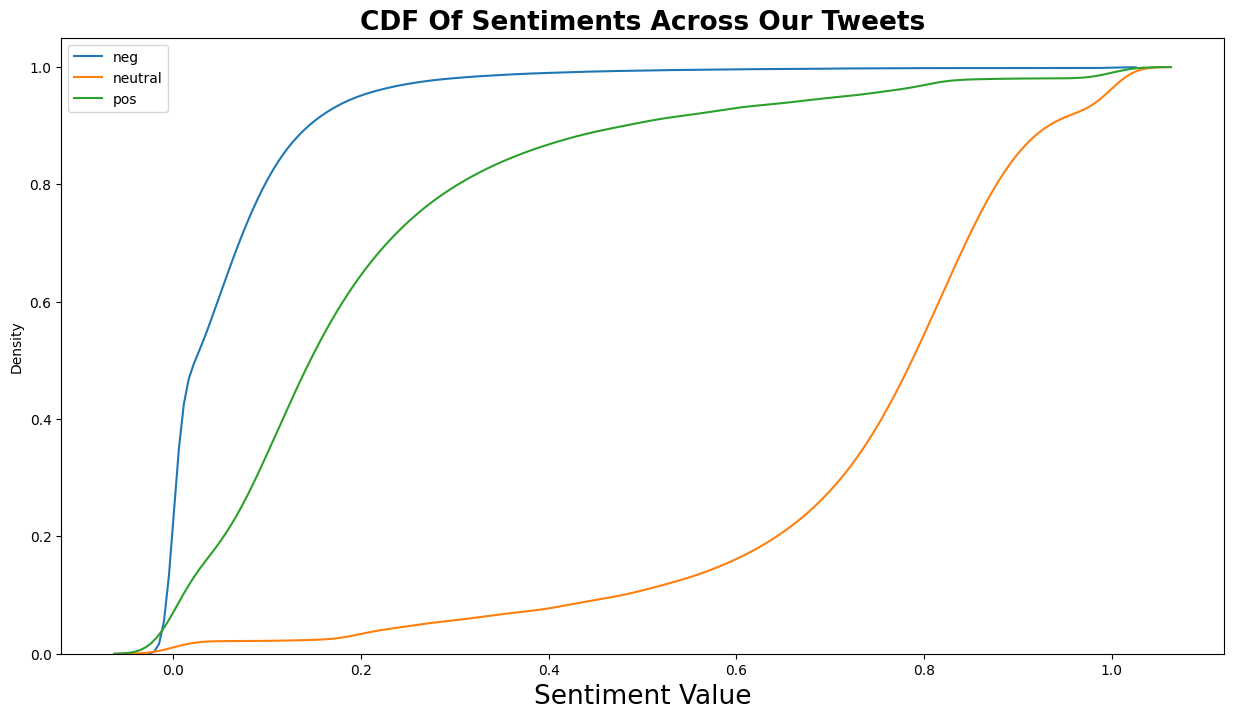

In [55]:

plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(M_data['neg'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['neu'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

# Intepretation of the graph
- It is also clear that the dominant sentiment is neutral; oddly, most of the reviews do not resemble more positive or negative sentiment rather than neutral.

In [56]:
M_data.dropna(inplace = True)

Creating a class column based on compound score

In [57]:
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [58]:
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

Converting the final sentiment score dataframe to a csv file 

In [59]:
M_data.to_csv("M_datafinal.csv")

In [60]:
M_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12


# Text Classification

- Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [61]:
df = pd.read_csv('M_datafinal.csv')
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12


In [62]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [63]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           115
reviewerName          24
overall                0
unixReviewTime         0
reviewTime             0
title                  3
category               0
price             250520
brand               2319
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

In [64]:
df.dropna(inplace = True)

Dropping the unnamed column

In [65]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [66]:
# slicing the data
df1 = df.iloc[:100, :]
df1.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
51,pos,0321719816,i ve been using dreamweaver and it s predecess...,WB Halper,4.0,1.287533e+09,2010-10-20,learn adobe dreamweaver cs5 by video core trai...,[],$35.23,Peach Pit Press,Pos,0.000,0.843,0.157,0.9896,2010,10
52,pos,0321719816,the demo is done with the pc version with refe...,Grimmy,4.0,1.287360e+09,2010-10-18,learn adobe dreamweaver cs5 by video core trai...,[],$35.23,Peach Pit Press,Pos,0.035,0.884,0.081,0.9255,2010,10
53,pos,0321719816,if you ve been wanting to learn how to create ...,D. Fowler,5.0,1.287187e+09,2010-10-16,learn adobe dreamweaver cs5 by video core trai...,[],$35.23,Peach Pit Press,Pos,0.008,0.864,0.127,0.9996,2010,10
54,neg,0321719816,i ve been working with dreamweaver for a few y...,Dr. Cathy Goodwin,5.0,1.287014e+09,2010-10-14,learn adobe dreamweaver cs5 by video core trai...,[],$35.23,Peach Pit Press,Pos,0.097,0.833,0.070,-0.7439,2010,10
55,pos,0321719816,i ve been creating websites with dreamweaver f...,Bryan Newman,5.0,1.286842e+09,2010-10-12,learn adobe dreamweaver cs5 by video core trai...,[],$35.23,Peach Pit Press,Pos,0.046,0.805,0.149,0.9953,2010,10


### Removing Stop Words

Stop words are commonly used words in a language that are generally considered to be of little value in determining the meaning or sentiment of a text. Examples of stop words in English include "the", "a", "an", "in", "on", "is", "and", "of", "at", "to", and so on.

In natural language processing, stop words are often removed from texts before further processing such as sentiment analysis, topic modeling, or text classification. This is because stop words can introduce noise into the analysis and may not add any meaningful information to the text. Removing stop words can also help reduce the computational complexity of processing large volumes of text.


In [67]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Applying the stop word function on the reviewText Column

In [69]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Making WordCloud

In [70]:
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['reviewText']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [71]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'title', 'category', 'price', 'brand',
       'Sentiment', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [72]:
neg=df[df["Class"] == "Neg"]["reviewText"]
pos=df[df["Class"] == "Pos"]["reviewText"]
neu=df[df["Class"] == "Neutral"]["reviewText"]

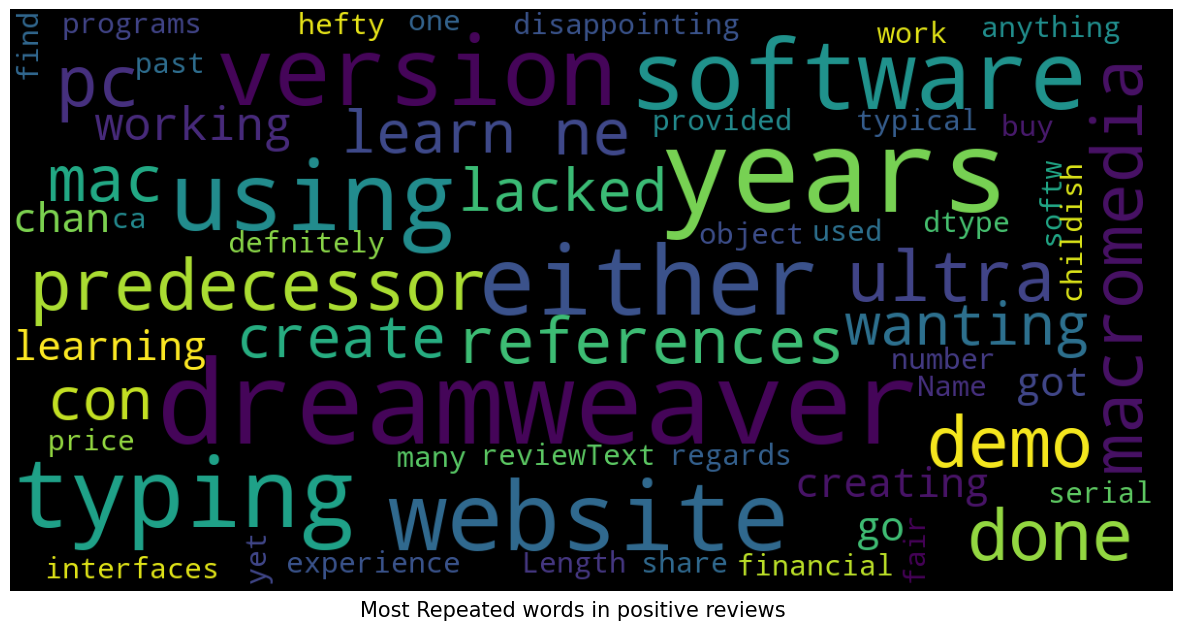

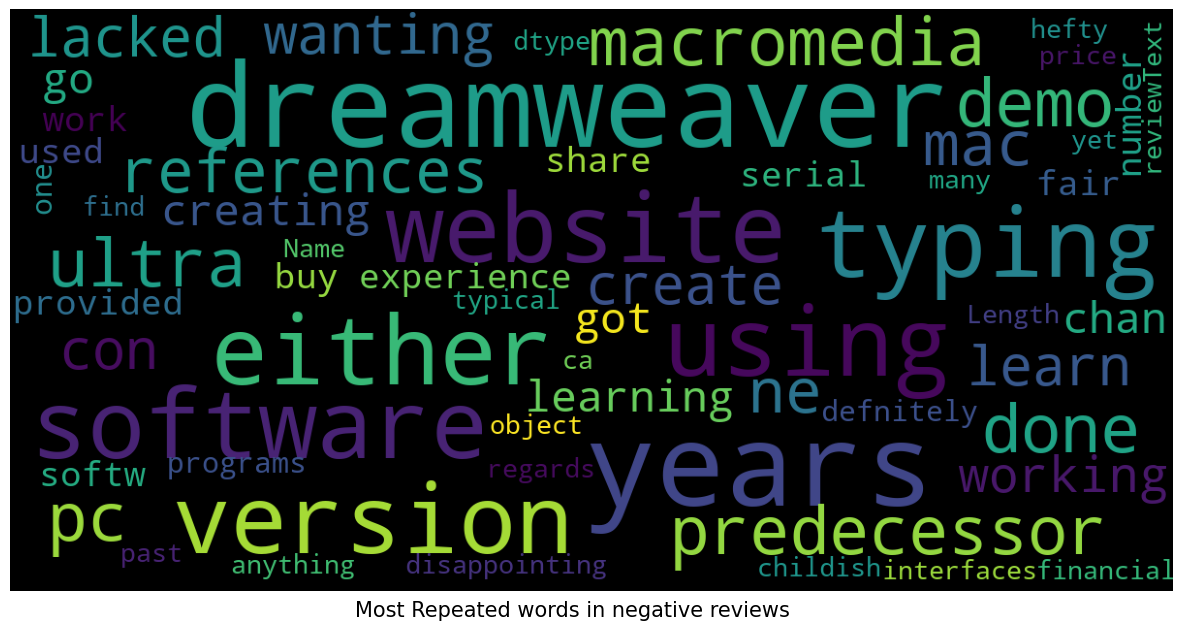

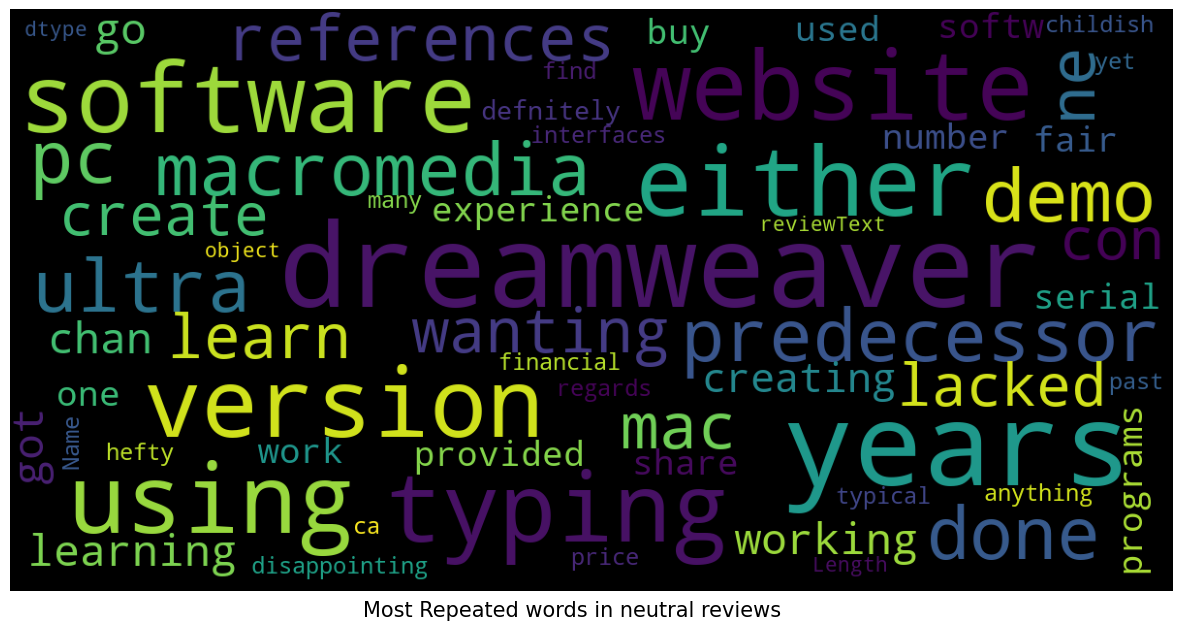

In [74]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

#### From about WordCLoud We can see the most used positive,negative and neutral words from the reviewText

## Building the model for Sentiment Prediction

In [76]:
df=pd.read_csv('M_datafinal.csv')

In [77]:
df.head(10)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12
5,5,pos,0077613252,was for class came in great shape,Just4u,4.0,1.438560e+09,2015-08-03,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.594,0.406,0.6249,2015,8
6,6,neutral,0077613252,fast shipping products as described,Theresa,4.0,1.437264e+09,2015-07-19,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,1.000,0.000,0.0000,2015,7
7,7,pos,0077613252,i wouldn t waste money on the book i bought th...,Ashley Mercer,3.0,1.433981e+09,2015-06-11,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.089,0.767,0.144,0.1779,2015,6
8,8,neutral,0077613252,passed the class,Dre,4.0,1.426118e+09,2015-03-12,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,1.000,0.000,0.0000,2015,3
9,9,pos,0077613252,great time shippn,Jonathan Beattie,5.0,1.409702e+09,2014-09-03,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.328,0.672,0.6249,2014,9


### Building model for prediction


In [118]:
from sklearn.metrics import ConfusionMatrixDisplay

In [176]:
X = df['reviewText']
Y = df['Sentiment']

In [177]:
X, Y = df.reviewText.fillna(' '), df.Sentiment

In [178]:
X.value_counts()

great                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1897
good                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1511
great product                                                                     

In [179]:
Y.value_counts()

Pos        257628
Neg        116352
Neutral     34704
Name: Sentiment, dtype: int64

In [180]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 0, ..., 2, 2, 0])

In [181]:
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 116352]
 [     1  34704]
 [     2 257628]]


Spitting the Training and Testing Data

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Applying TFIDF Vectorizer to convert Reviewtext to vector for model prediction

In [183]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Applying different model to get best models for classification

Considering different classification algorithms for prediction

#### Using Naive Bayes Classification

Making the model and fitting the data

In [184]:
model1 = MultinomialNB().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

Printing classification matrix

In [185]:
print(classification_report(Y_test, y_pred1, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.83      0.60      0.70     34837
         nue       0.21      0.00      0.00     10433
         pos       0.77      0.97      0.86     77336

    accuracy                           0.78    122606
   macro avg       0.61      0.53      0.52    122606
weighted avg       0.74      0.78      0.74    122606



#### Using Logistic Regression Model

Making the model and fitting the data

In [186]:
model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [187]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 34981]
 [    1  1175]
 [    2 86450]]


Printing the confustion matrix for Logistic Regression

In [188]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.78      0.79      0.78     34837
         neu       0.44      0.05      0.09     10433
         pos       0.84      0.94      0.89     77336

    accuracy                           0.82    122606
   macro avg       0.69      0.59      0.59    122606
weighted avg       0.79      0.82      0.79    122606

CPU times: total: 109 ms
Wall time: 147 ms


### Testing classification by putting sample reviews in the model

In [189]:
a = ['Nice product good to buy', 'worst product waste of money', 'Good product but not useful for this']
a1 = vectorizer.transform(a)

In [190]:
fo = model.predict(a1)
fo

array([2, 0, 2])

In [191]:
s = pd.DataFrame({"Random_review":a, "Predictions": ['Positive', 'Negative', 'Positive']})
s

,Random_review,Predictions
0,Nice product good to buy,Positive
1,worst product waste of money,Negative
2,Good product but not useful for this,Positive


As you can see that the Logistic Regression Model is working fine and classifying correctly

#### Using ADABoost Classifier

In [192]:
from sklearn.ensemble import AdaBoostClassifier  

Making the model and fitting the data

In [193]:
model2 = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred3 = model2.predict(X_test)

Printing the classification Matrix for AdaBoost Classifier

In [194]:
print(classification_report(Y_test, Y_pred3, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.72      0.50      0.59     34837
         nue       0.35      0.02      0.03     10433
         pos       0.74      0.94      0.83     77336

    accuracy                           0.74    122606
   macro avg       0.60      0.49      0.48    122606
weighted avg       0.70      0.74      0.69    122606



## Time Series Analysis of Sentiments

In [195]:
df1 = df[['neg', 'pos','neu', 'reviewTime']]

In [196]:
df1.head()

,neg,pos,neu,reviewTime
0,0.000,0.191,0.809,2014-03-11
1,0.000,0.110,0.890,2014-02-23
2,0.136,0.000,0.864,2014-02-17
3,0.096,0.078,0.826,2014-02-17
4,0.000,0.443,0.557,2015-12-20


In [197]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])

In [198]:
df1.head()

,neg,pos,neu,reviewTime
0,0.000,0.191,0.809,2014-03-11
1,0.000,0.110,0.890,2014-02-23
2,0.136,0.000,0.864,2014-02-17
3,0.096,0.078,0.826,2014-02-17
4,0.000,0.443,0.557,2015-12-20


In [199]:
df1 = df1.set_index('reviewTime')
df1.head()

,neg,pos,neu
reviewTime,,,
2014-03-11,0.000,0.191,0.809
2014-02-23,0.000,0.110,0.890
2014-02-17,0.136,0.000,0.864
2014-02-17,0.096,0.078,0.826
2015-12-20,0.000,0.443,0.557


Resampling the data based on weekly dates to fit into the Seasonal Decompose Graph

In [200]:
df1 = df1.resample('W').sum()
df1.shape

(1022, 3)

#### Seasonal Decompose for Positive Sentiments

Text(0.5, 1.0, 'Pos_residual')

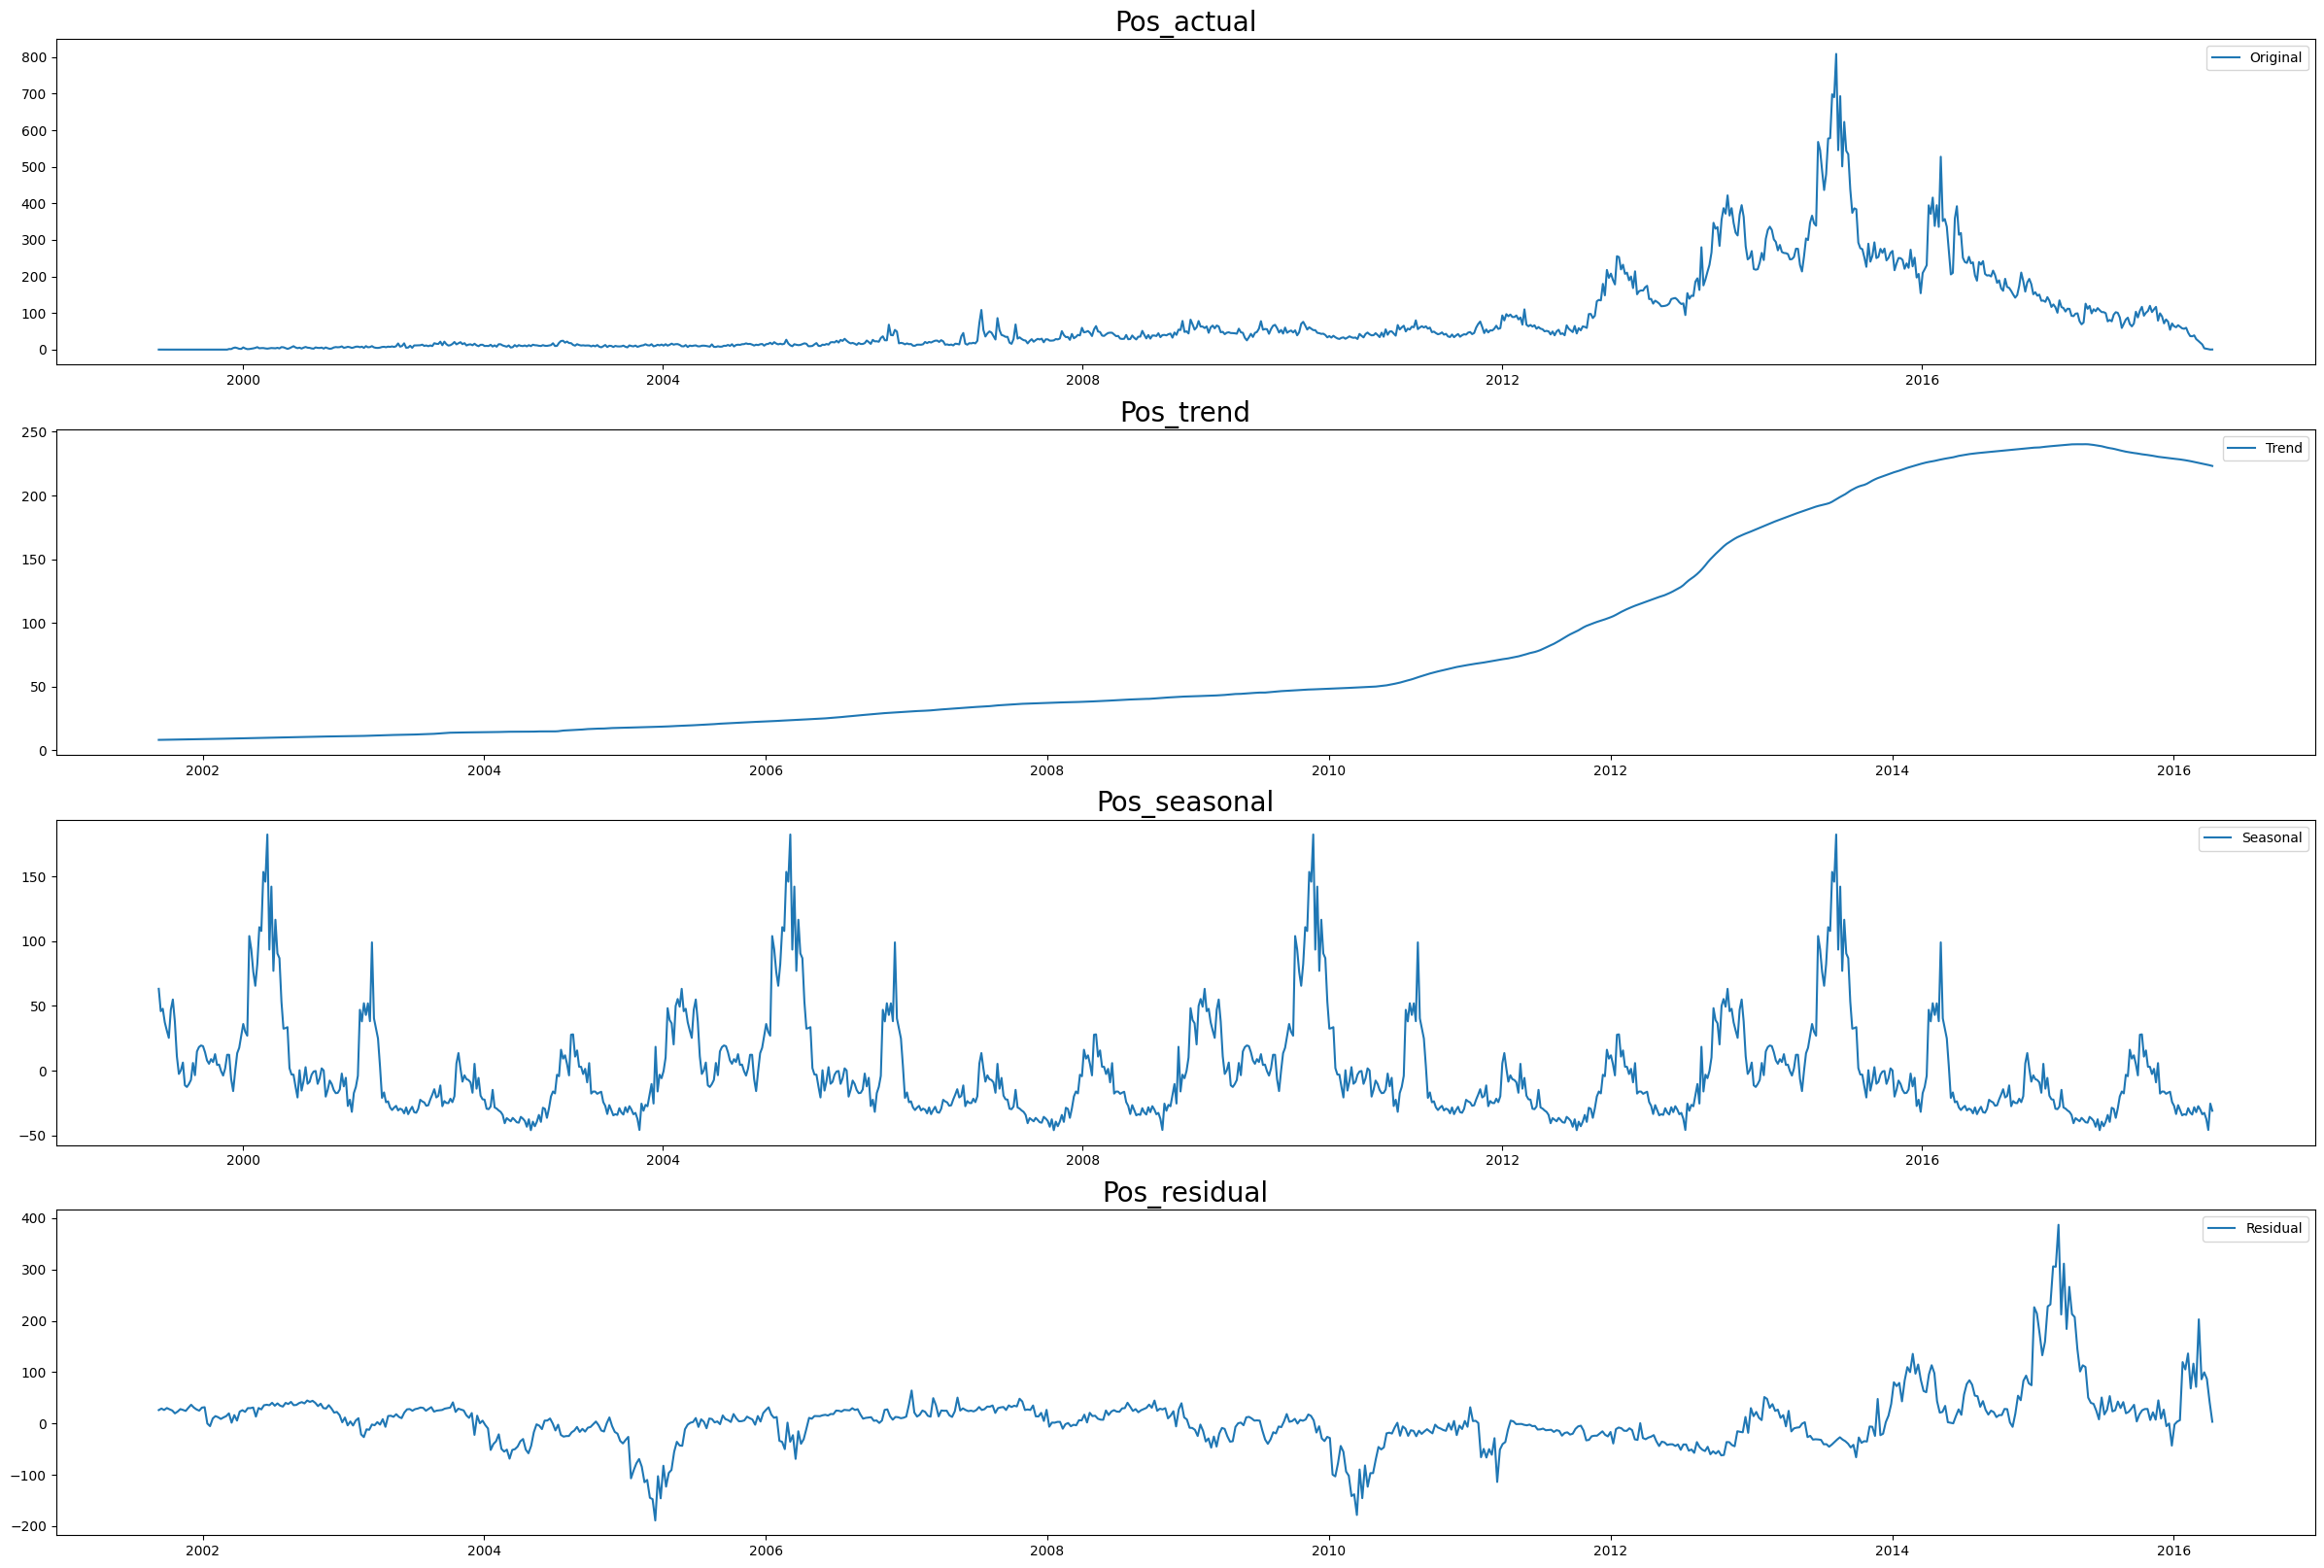

In [206]:


decomposition=seasonal_decompose(df1['pos'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['pos'],label='Original')
plt.legend(loc='best')
plt.title('Pos_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Pos_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Pos_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Pos_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for positive reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Negative Sentiment  

Text(0.5, 1.0, 'neg_residual')

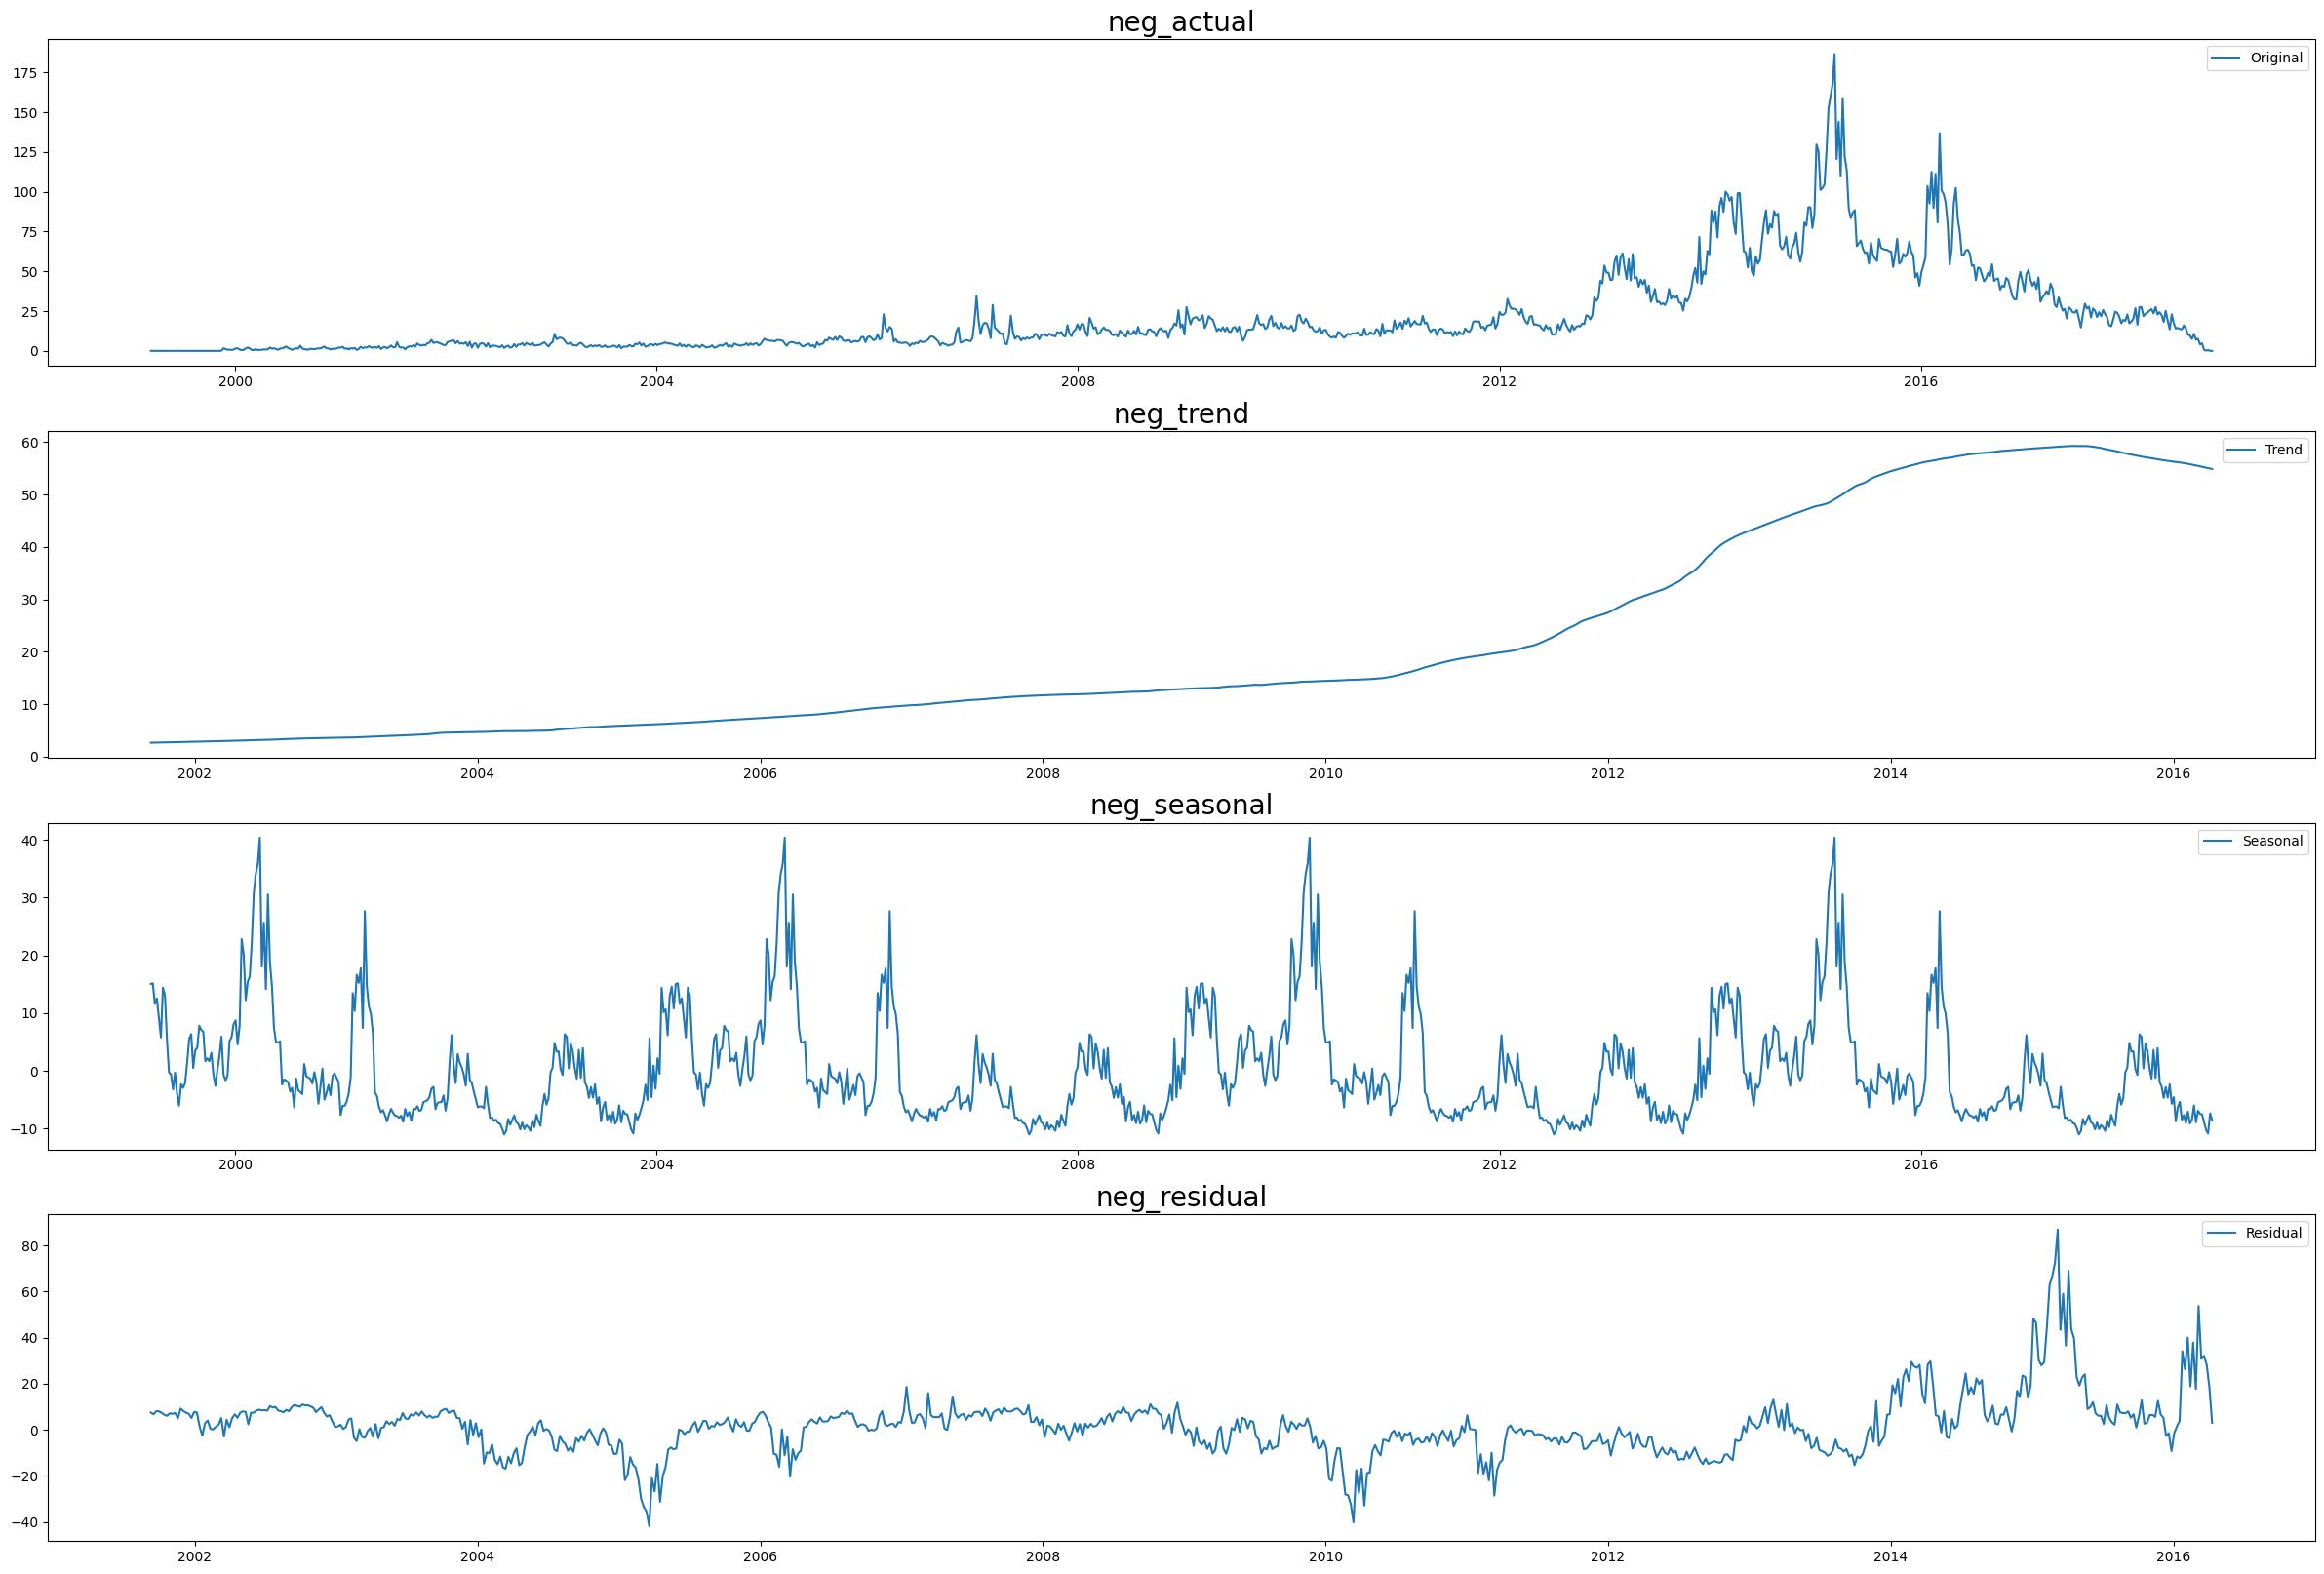

In [207]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neg'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neg'],label='Original')
plt.legend(loc='best')
plt.title('neg_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neg_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neg_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neg_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for negative reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Neutral Reviews

Text(0.5, 1.0, 'neu_residual')

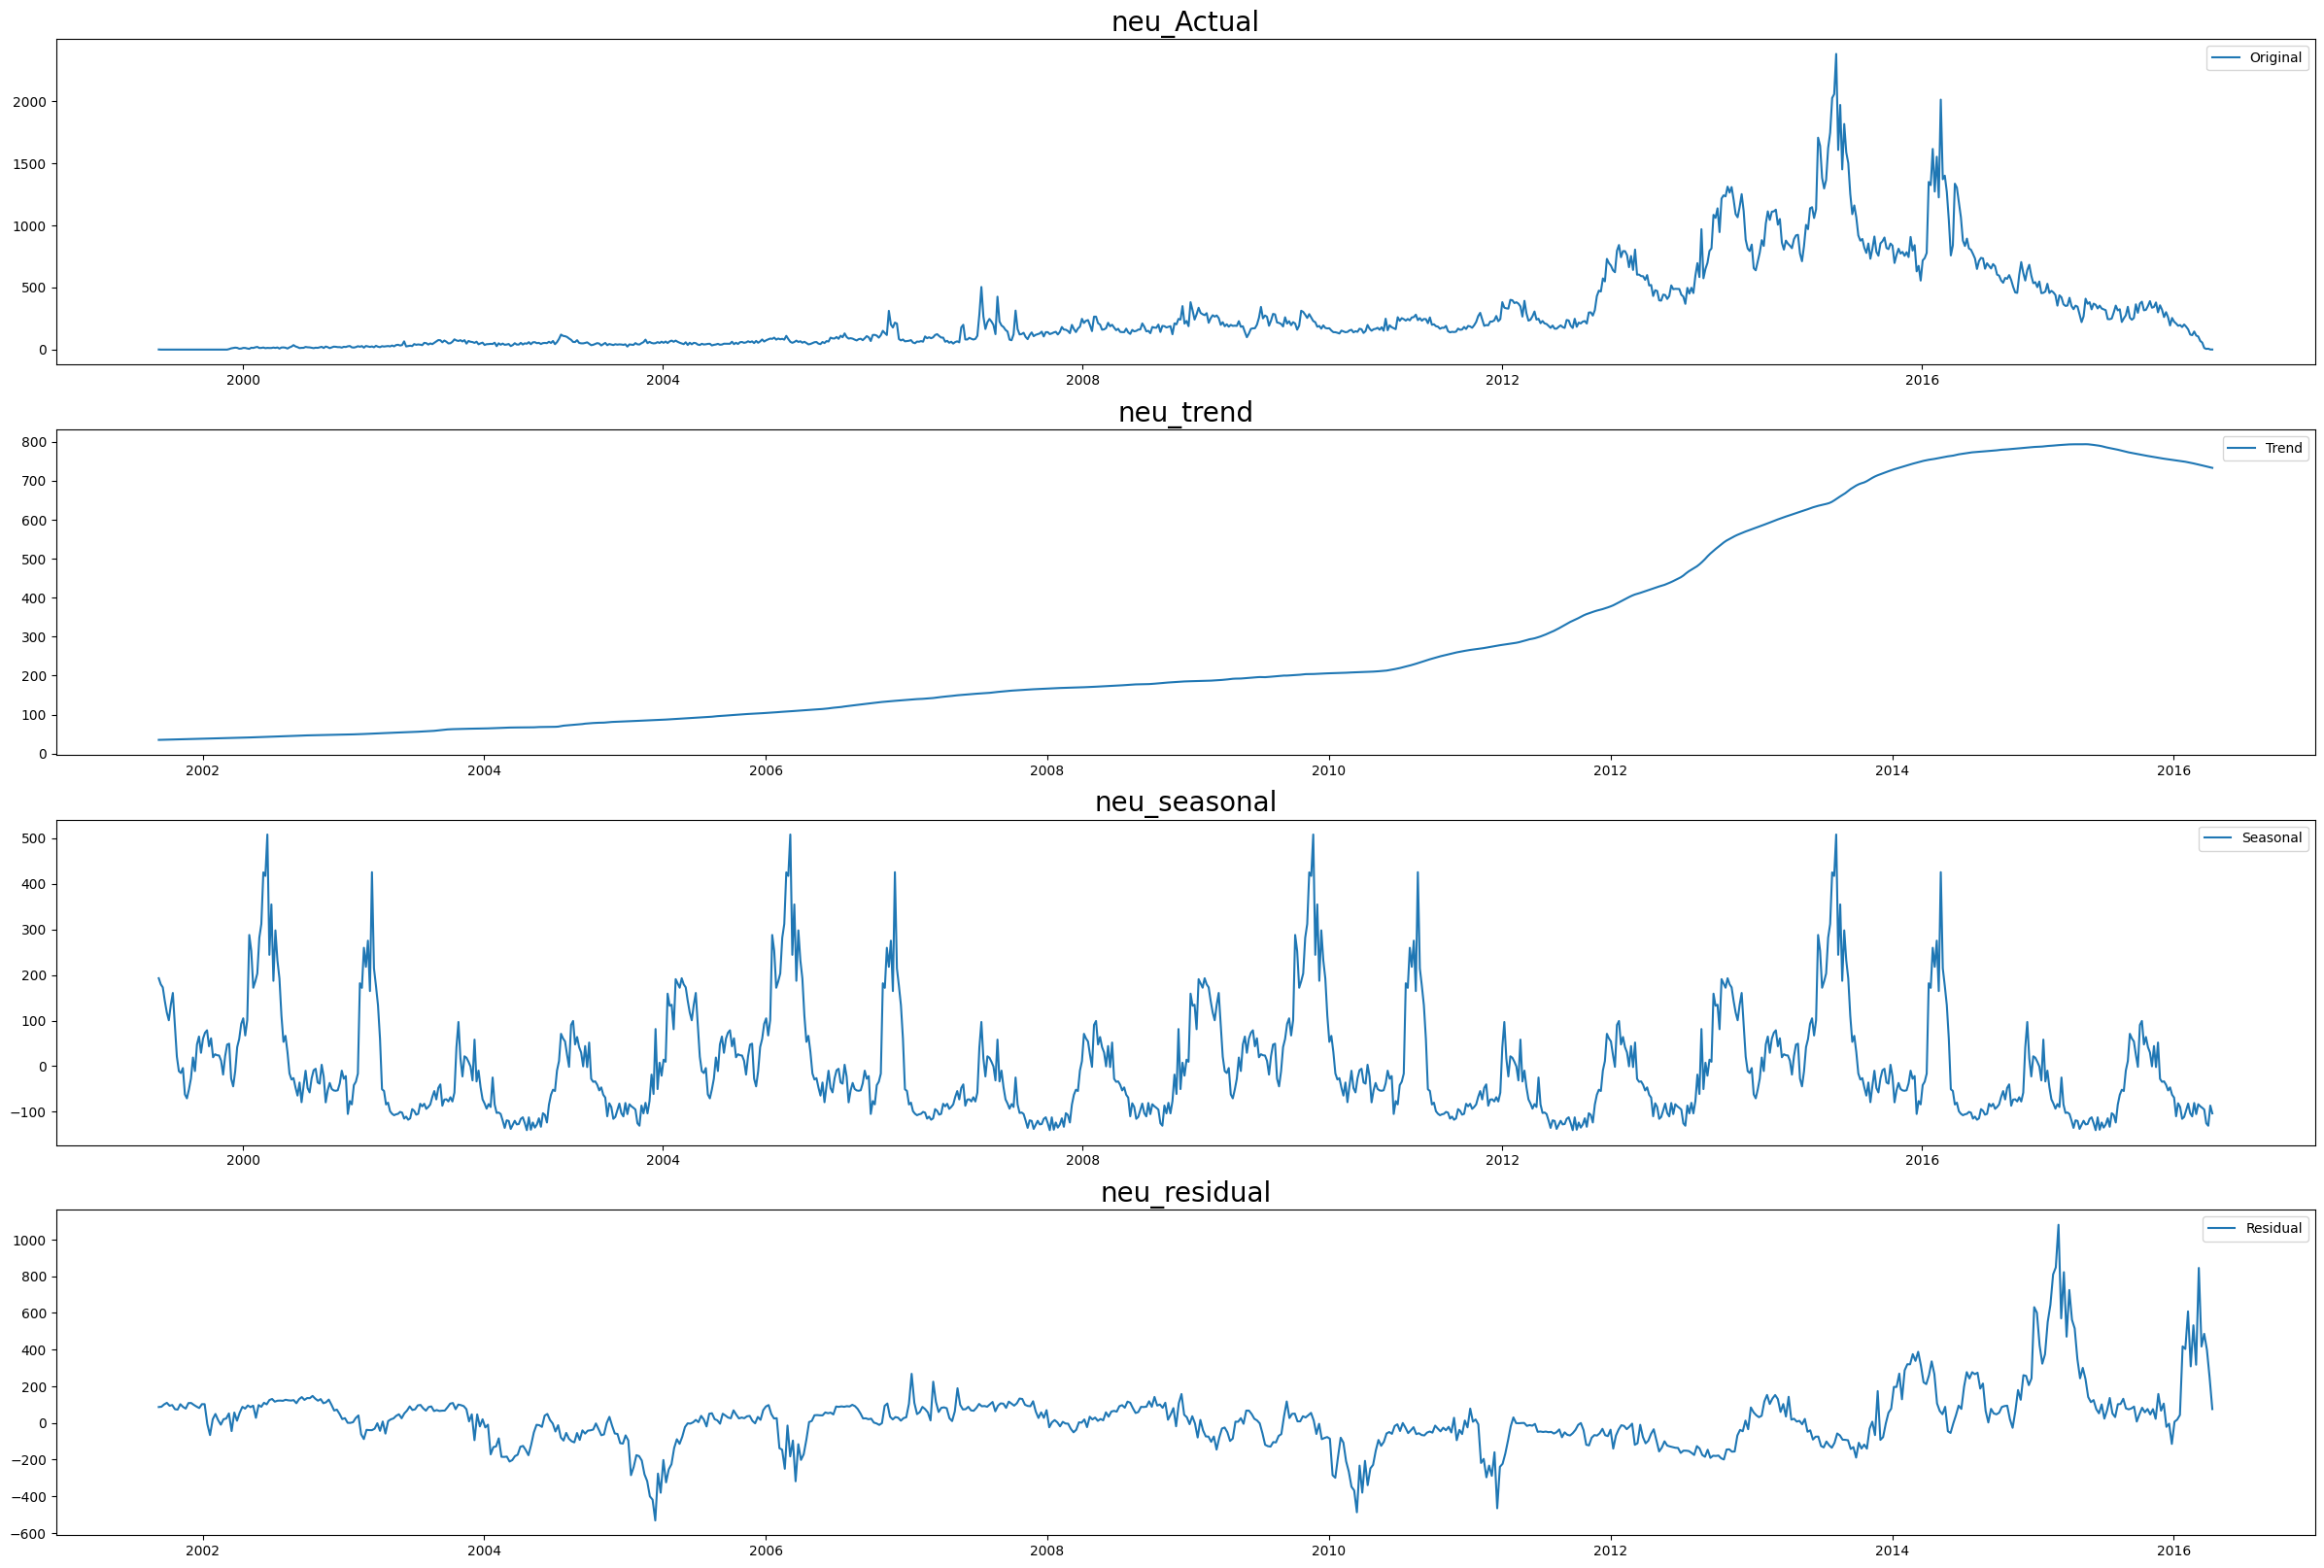

In [208]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neu'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neu'],label='Original')
plt.legend(loc='best')
plt.title('neu_Actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neu_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neu_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neu_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for neutral reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

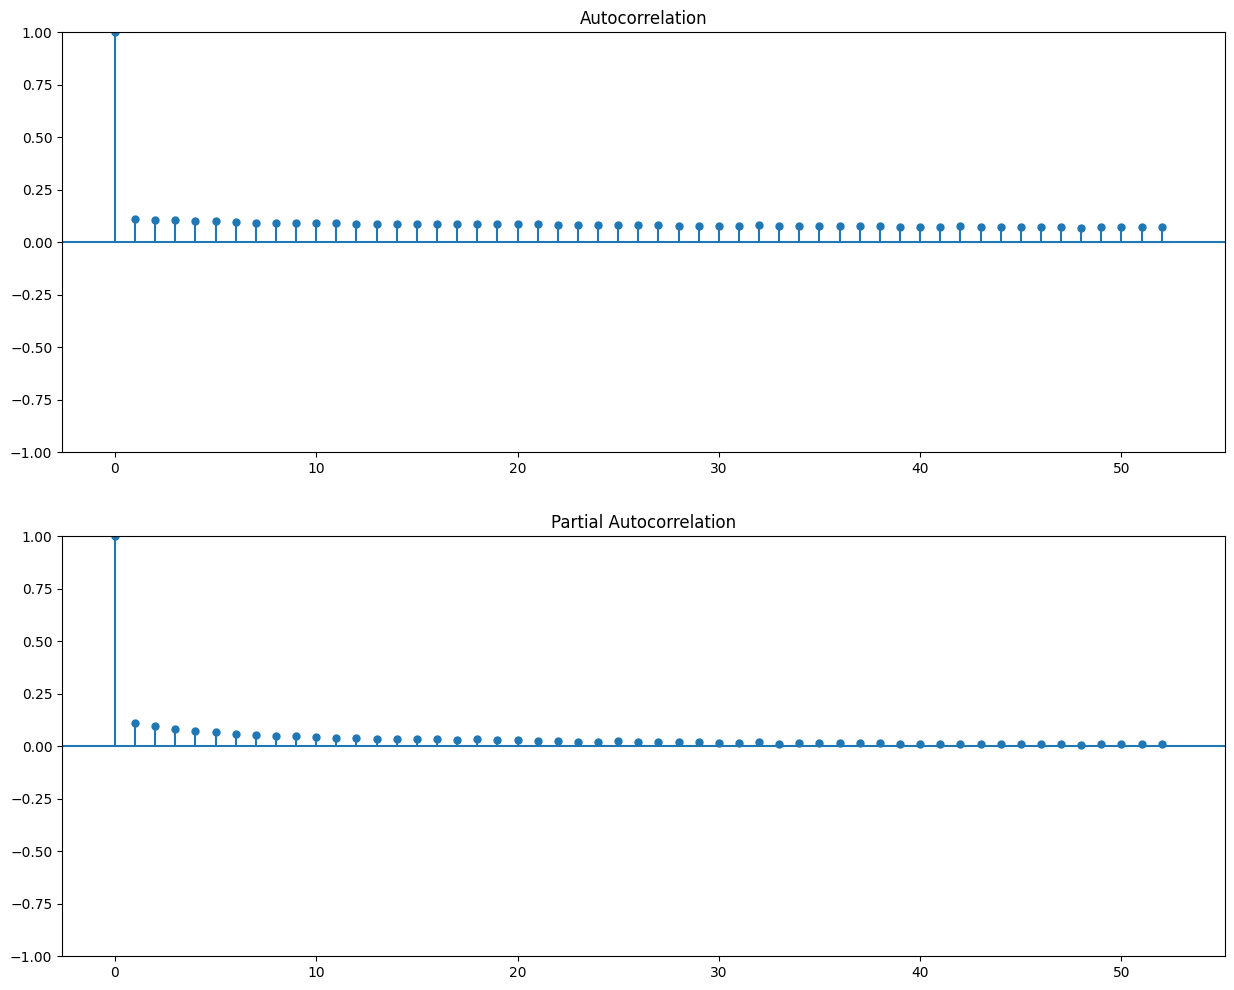

In [211]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['pos'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['pos'], ax=plt.gca(), lags = 52)
plt.show()

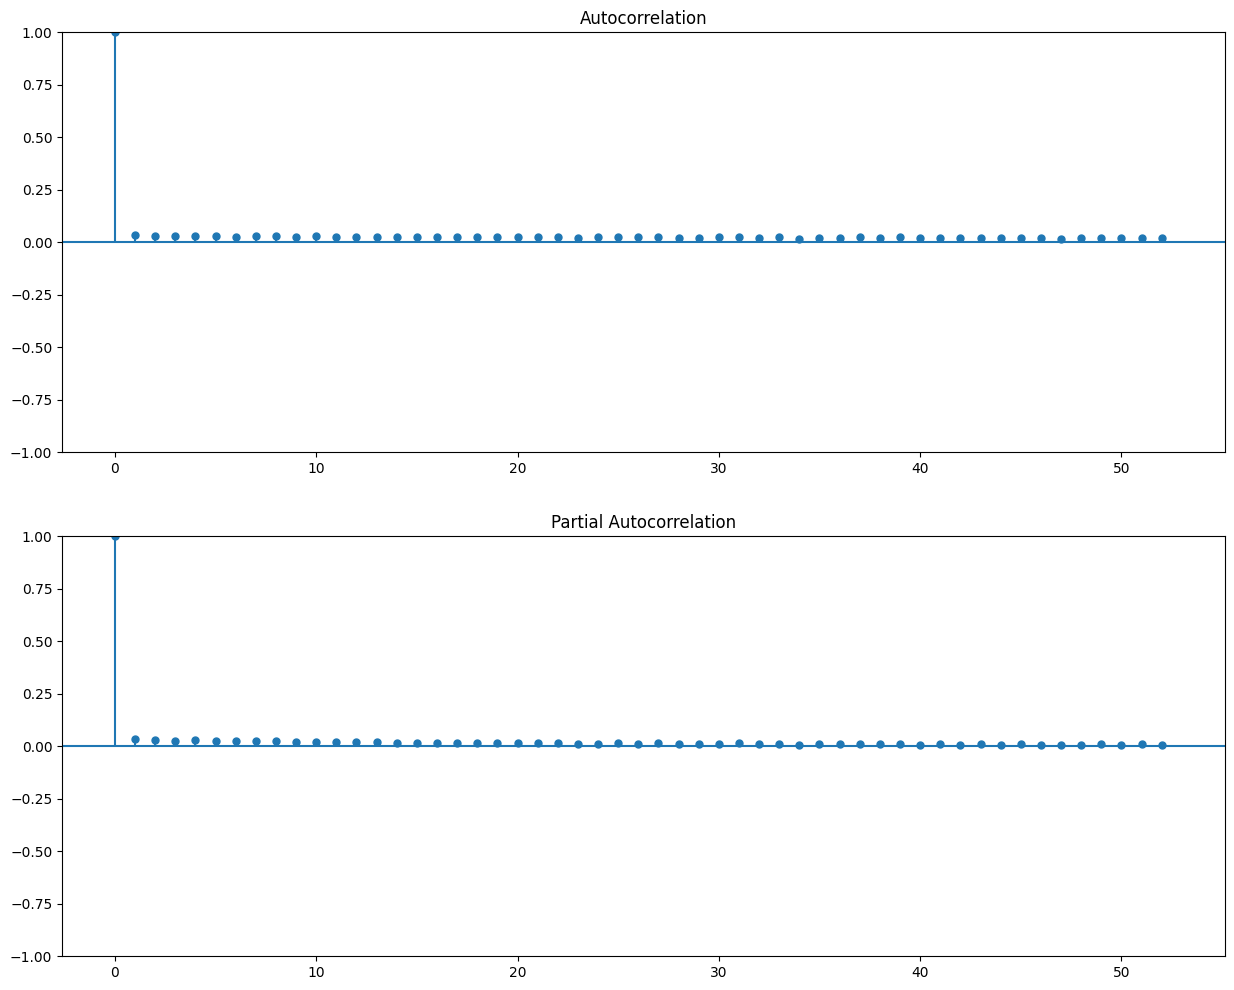

In [212]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['neg'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['neg'], ax=plt.gca(), lags = 52)
plt.show()

### Checking Stationarity of the Dataset

In [214]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [215]:
checkstationary(df1['neg'])

'Pvalue:0.3600437532496643.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**</div>

In [217]:
checkstationary(df1['pos'])

'Pvalue:0.38039478056814535.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**

## Predicting Sentiments 

Splitting the Data for fitting into Sarimax Model

In [218]:
split = int(0.95 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 970, Test = 52


Creating a Sarimax function to get optimum p and q values

In [219]:
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [221]:
p=[0,1, 2]
d=1
q=[0,1, 2]
p1=[]
q1=[]
rmse1=[]
P=[0,1, 2]
Q=[0,1, 2]
D=1
P1=[]
Q1=[]
for i in range(len(p)):
    for j in range(len(q)):
        for k in range(len(P)):
            for l in range(len(Q)):
                p1.append(p[i])
                q1.append(q[j])
                P1.append(P[k])
                Q1.append(Q[l])
                rmse1.append(sarima_model(endog,p[i],d,q[j],P[k],D,Q[l])[0])

NameError: name 'endog' is not defined

In [222]:
val2 = pd.DataFrame(zip(p1,q1,P1,Q1,rmse1),columns=['p','q','P','Q','RMSE'])
val2.sort_values(by='RMSE').head(1)

,p,q,P,Q,RMSE


In [223]:
def SARMA1(df):
    model2 = SARIMAX(train['neg'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [224]:
def SARMA2(df):
    model2 = SARIMAX(train['pos'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [228]:
train1 = SARMA1(train['neg'])

Summary : S
past_predictions : past
future_predictions : future


In [229]:
train2 = SARMA2(train['pos'])

Summary : S
past_predictions : past
future_predictions : future


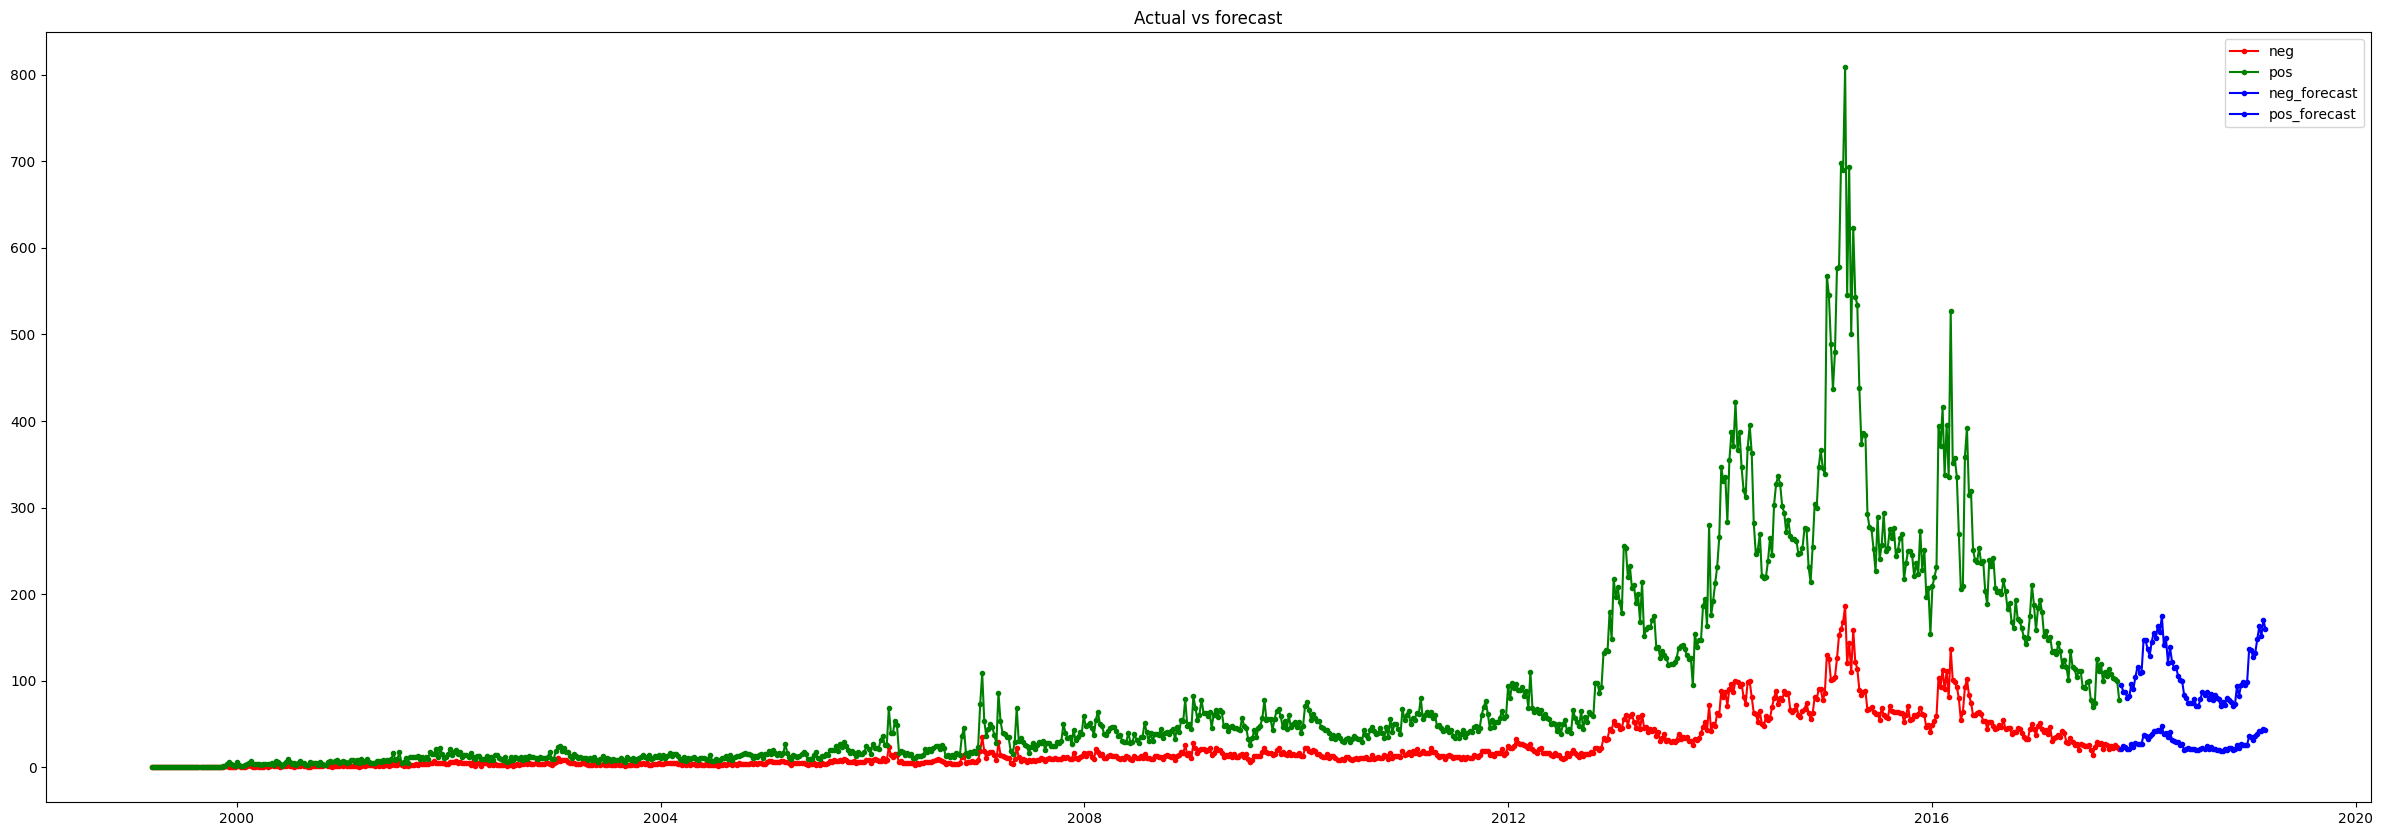

In [230]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast')
plt.plot(train['neg'],marker = '.', label = 'neg', color = 'red')
plt.plot(train['pos'],marker = '.', label = 'pos', color = 'g')
plt.plot(train1,marker = '.', label = 'neg_forecast', color = 'b')
plt.plot(train2,marker = '.', label = 'pos_forecast', color = 'b')
plt.legend()

In [231]:
pos_rmse = np.sqrt(mean_squared_error(test['pos'], train2[:-20]))
neg_rmse = np.sqrt(mean_squared_error(test['pos'], train1[:-20]))

In [232]:
res = pd.DataFrame({'Sentiments':['Pos', 'neg'], 'RMSE':[pos_rmse, neg_rmse]})
res

,Sentiments,RMSE
0,Pos,44.242488
1,neg,49.086680


### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of forcast data we can see the SARIMA model is giving good forcast results and the positive and negative reviews are increasing over period but the positive reviews are inresing in more percent compare to negative review**</div>

### Time series analysis of the price of the sector

In [233]:
df.head(200)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],NaN,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,pos,0615179088,beware i bought this item new and spoke with a...,Kimchi Cakes,4.0,1.380931e+09,2013-10-05,human japanese,"['Software', 'Education & Reference', 'Languag...",$39.94,Brak Software,Pos,0.029,0.925,0.046,0.3400,2013,10
196,196,pos,0615179088,currently i m about halfway through the progra...,atomskeater,5.0,1.379203e+09,2013-09-15,human japanese,"['Software', 'Education & Reference', 'Languag...",$39.94,Brak Software,Pos,0.014,0.891,0.095,0.9435,2013,9
197,197,pos,0615179088,that i bought it on my tablet too digitally fr...,Torus Bakery,5.0,1.375661e+09,2013-08-05,human japanese,"['Software', 'Education & Reference', 'Languag...",$39.94,Brak Software,Pos,0.069,0.784,0.147,0.7340,2013,8
198,198,pos,0615179088,this title has a lot of really good informatio...,Daver,5.0,1.371341e+09,2013-06-16,human japanese,"['Software', 'Education & Reference', 'Languag...",$39.94,Brak Software,Pos,0.000,0.869,0.131,0.7504,2013,6


In [234]:
df.describe()

,Unnamed: 0,overall,unixReviewTime,neg,neu,pos,compound,year,month
count,408684.000000,408684.000000,4.086840e+05,408684.000000,408684.000000,408684.000000,408684.000000,408684.000000,408684.000000
mean,237730.209903,3.596542,1.375303e+09,0.054168,0.736511,0.208344,0.391274,2013.131532,5.938630
std,122398.683019,1.617671,1.120704e+08,0.087360,0.206303,0.214415,0.535317,3.570802,3.569238
min,0.000000,1.000000,9.213696e+08,0.000000,0.000000,0.000000,-0.999400,1999.000000,1.000000
25%,138192.750000,2.000000,1.337558e+09,0.000000,0.680000,0.074000,0.000000,2012.000000,3.000000
50%,240428.500000,4.000000,1.408925e+09,0.021000,0.787000,0.146000,0.571900,2014.000000,5.000000
75%,342658.250000,5.000000,1.450138e+09,0.082000,0.859000,0.263000,0.840200,2015.000000,9.000000
max,450267.000000,5.000000,1.538352e+09,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000


In [235]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           115
reviewerName          24
overall                0
unixReviewTime         0
reviewTime             0
title                  3
category               0
price             250520
brand               2319
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

Replacing the $(dollar) sign from the price to blank to convert the column into a int dataframe from str dataframe

In [236]:
df['price'] = df['price'].str.replace('$', '')

Replacing the NaN values with a space

In [238]:
df['price'] = df['price'].str.replace('NaN', '')

Filling empty places with 0

In [240]:
df['price'].fillna('', inplace=True)

In [241]:
df['price'] = df['price'].replace('', '0')


In [242]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],0,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],0,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],0,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],0,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],0,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,pos,0321700945,i have never owned a slr camera and never used...,Amazon Customer,5.0,1.299802e+09,2011-03-11,learn adobe photoshop lightroom by video,[],24.99,Peach Pit Press,Pos,0.019,0.889,0.092,0.8886,2011,3
96,96,pos,0321700945,one of the best purchases i have made in a lon...,D. Thompson,5.0,1.298765e+09,2011-02-27,learn adobe photoshop lightroom by video,[],24.99,Peach Pit Press,Pos,0.000,0.861,0.139,0.6369,2011,2
97,97,pos,0321700945,had a chance to try this out here are a few im...,Jesse Walker,5.0,1.297555e+09,2011-02-13,learn adobe photoshop lightroom by video,[],24.99,Peach Pit Press,Pos,0.015,0.808,0.178,0.9980,2011,2
98,98,pos,0321700945,there are over video lessons here most users h...,Colinda,3.0,1.294531e+09,2011-01-09,learn adobe photoshop lightroom by video,[],24.99,Peach Pit Press,Neutral,0.049,0.811,0.139,0.9733,2011,1


Converting the column from str data type to int data type 

In [243]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
default_value = 0.0
df['price'] = df['price'].fillna(default_value)

# convert price column to float type
df['price'] = df['price'].astype(float)


In [245]:
df['price'] = df['price'].astype(float).round().astype(int)

Filling up all the null values(0) with the standard mean of the data to get a stationary dataset

In [246]:
mean_price = df['price'].mean()
std_dev_price = df['price'].std()
null_count = df['price'].isnull().sum()
rand_prices = np.random.normal(loc=mean_price, scale=std_dev_price, size=null_count)
df['price'].fillna(pd.Series(rand_prices), inplace=True)
print(df)

        Unnamed: 0 Class        asin  \
0                0   pos  0077613252   
1                1   pos  0077613252   
2                2   neg  0077613252   
3                3   neg  0077613252   
4                4   pos  0077613252   
...            ...   ...         ...   
408679      450259   pos  B00005V6NE   
408680      450261   neg  B00005V6NE   
408681      450263   pos  B00005V6NE   
408682      450265   pos  B00005V57S   
408683      450267   pos  B00005V7GL   

                                               reviewText  \
0       the materials arrived early and were in excell...   
1       i am really enjoying this book with the worksh...   
2       if you are taking this class don t waste your ...   
3       this book was missing pages important pages i ...   
4                      very informative easy for studying   
...                                                   ...   
408679  i only whish it had the apocrypha i love the s...   
408680  i have used this softwa

In [247]:
mean_price = df['price'][df['price'] != 0].mean()
std_price = df['price'][df['price'] != 0].std()
df['price'] = df['price'].apply(lambda x: np.random.normal(mean_price, std_price) if x == 0 else x)

print(df)

        Unnamed: 0 Class        asin  \
0                0   pos  0077613252   
1                1   pos  0077613252   
2                2   neg  0077613252   
3                3   neg  0077613252   
4                4   pos  0077613252   
...            ...   ...         ...   
408679      450259   pos  B00005V6NE   
408680      450261   neg  B00005V6NE   
408681      450263   pos  B00005V6NE   
408682      450265   pos  B00005V57S   
408683      450267   pos  B00005V7GL   

                                               reviewText  \
0       the materials arrived early and were in excell...   
1       i am really enjoying this book with the worksh...   
2       if you are taking this class don t waste your ...   
3       this book was missing pages important pages i ...   
4                      very informative easy for studying   
...                                                   ...   
408679  i only whish it had the apocrypha i love the s...   
408680  i have used this softwa

In [248]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0077613252,the materials arrived early and were in excell...,Michelle W,4.0,1.394496e+09,2014-03-11,connect personal health with learnsmart semest...,[],155.241904,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.809,0.191,0.6870,2014,3
1,1,pos,0077613252,i am really enjoying this book with the worksh...,Rosalind White Ames,4.0,1.393114e+09,2014-02-23,connect personal health with learnsmart semest...,[],-14.953234,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.890,0.110,0.5709,2014,2
2,2,neg,0077613252,if you are taking this class don t waste your ...,Allan R. Baker,1.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],128.418132,McGraw-Hill Humanities/Social Sciences/Languages,Neg,0.136,0.864,0.000,-0.7845,2014,2
3,3,neg,0077613252,this book was missing pages important pages i ...,Lucy,3.0,1.392595e+09,2014-02-17,connect personal health with learnsmart semest...,[],24.082894,McGraw-Hill Humanities/Social Sciences/Languages,Neutral,0.096,0.826,0.078,-0.1027,2014,2
4,4,pos,0077613252,very informative easy for studying,Rachael Carter,5.0,1.450570e+09,2015-12-20,connect personal health with learnsmart semest...,[],196.970386,McGraw-Hill Humanities/Social Sciences/Languages,Pos,0.000,0.557,0.443,0.4902,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,pos,0321700945,i have never owned a slr camera and never used...,Amazon Customer,5.0,1.299802e+09,2011-03-11,learn adobe photoshop lightroom by video,[],25.000000,Peach Pit Press,Pos,0.019,0.889,0.092,0.8886,2011,3
96,96,pos,0321700945,one of the best purchases i have made in a lon...,D. Thompson,5.0,1.298765e+09,2011-02-27,learn adobe photoshop lightroom by video,[],25.000000,Peach Pit Press,Pos,0.000,0.861,0.139,0.6369,2011,2
97,97,pos,0321700945,had a chance to try this out here are a few im...,Jesse Walker,5.0,1.297555e+09,2011-02-13,learn adobe photoshop lightroom by video,[],25.000000,Peach Pit Press,Pos,0.015,0.808,0.178,0.9980,2011,2
98,98,pos,0321700945,there are over video lessons here most users h...,Colinda,3.0,1.294531e+09,2011-01-09,learn adobe photoshop lightroom by video,[],25.000000,Peach Pit Press,Neutral,0.049,0.811,0.139,0.9733,2011,1


### Time series analysis of price using Facebook Prophet 

In [249]:
df.to_csv("pricefinal.csv")

In [250]:
data=pd.read_csv('pricefinal.csv')

In [251]:
data1=data[['reviewTime','price']]

In [252]:
import prophet

In [253]:
from prophet import Prophet

In [254]:
data1.head()

,reviewTime,price
0,2014-03-11,155.241904
1,2014-02-23,-14.953234
2,2014-02-17,128.418132
3,2014-02-17,24.082894
4,2015-12-20,196.970386


Making the Model and Fitting the data

In [255]:
model= Prophet()

In [256]:
data1.columns=['ds','y']

In [257]:
data1.head()

,ds,y
0,2014-03-11,155.241904
1,2014-02-23,-14.953234
2,2014-02-17,128.418132
3,2014-02-17,24.082894
4,2015-12-20,196.970386


In [258]:
model.fit(data1)

13:51:44 - cmdstanpy - INFO - Chain [1] start processing
13:54:00 - cmdstanpy - INFO - Chain [1] done processing


In [259]:
model

In [262]:
future = model.make_future_dataframe(periods=3650)
future.tail()

,ds
10496,2028-09-24
10497,2028-09-25
10498,2028-09-26
10499,2028-09-27
10500,2028-09-28


In [263]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10496,2028-09-24,65.819195,-118.776309,252.877899
10497,2028-09-25,66.721434,-123.588426,258.453062
10498,2028-09-26,66.393789,-140.722205,256.403687
10499,2028-09-27,65.634337,-122.085562,261.393189
10500,2028-09-28,65.929207,-125.390983,261.745291


<Axes: title={'center': 'Actual vs Forecast'}, xlabel='ds'>

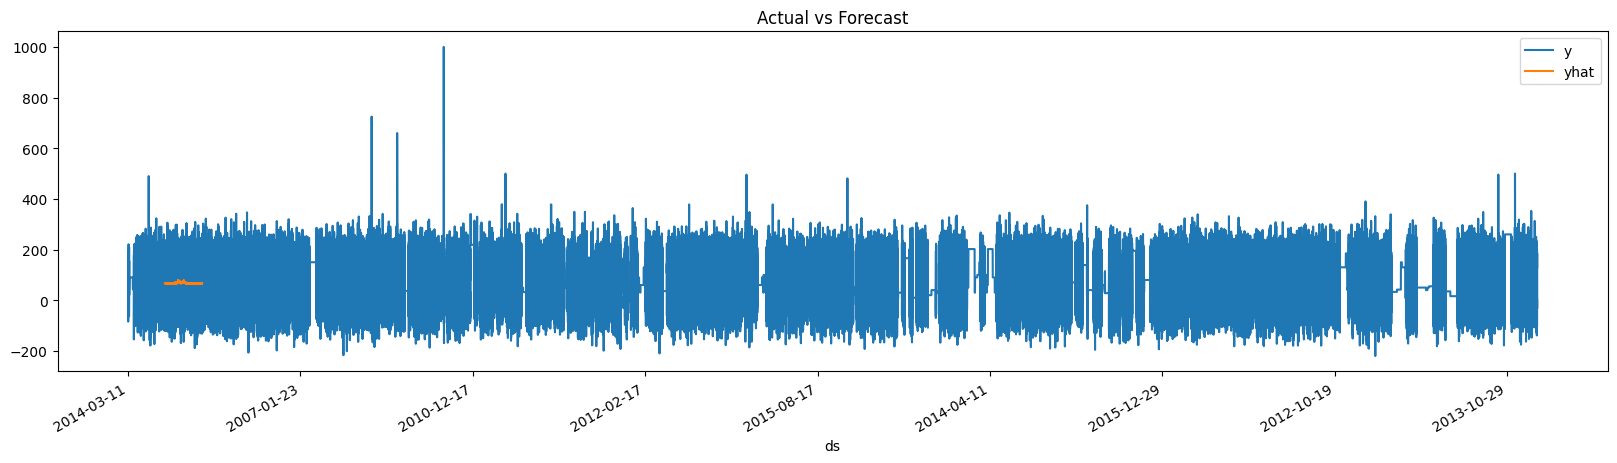

In [265]:
ax = (data1.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

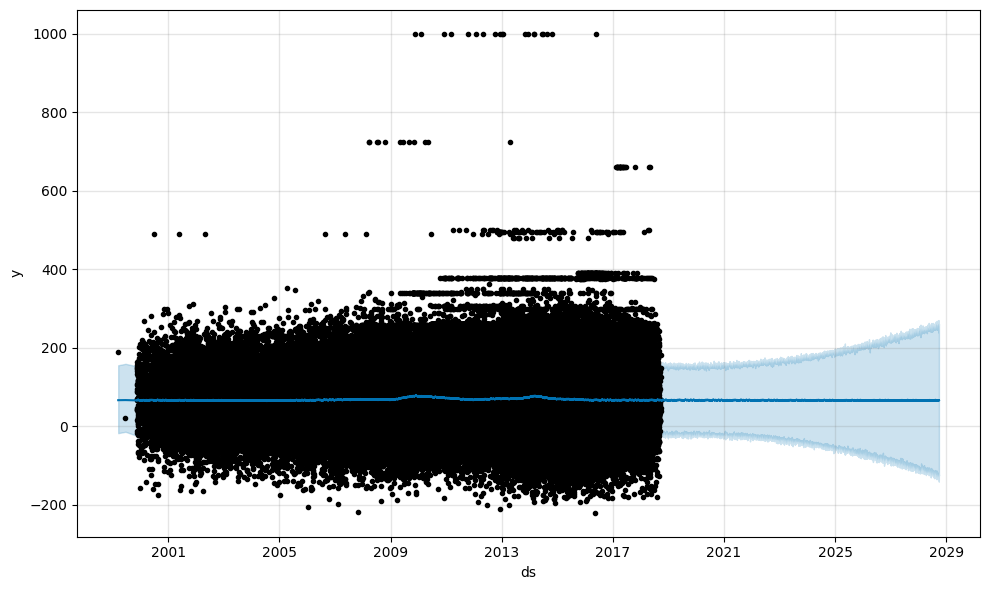

In [266]:
fig1 = model.plot(forecast, uncertainty=True)

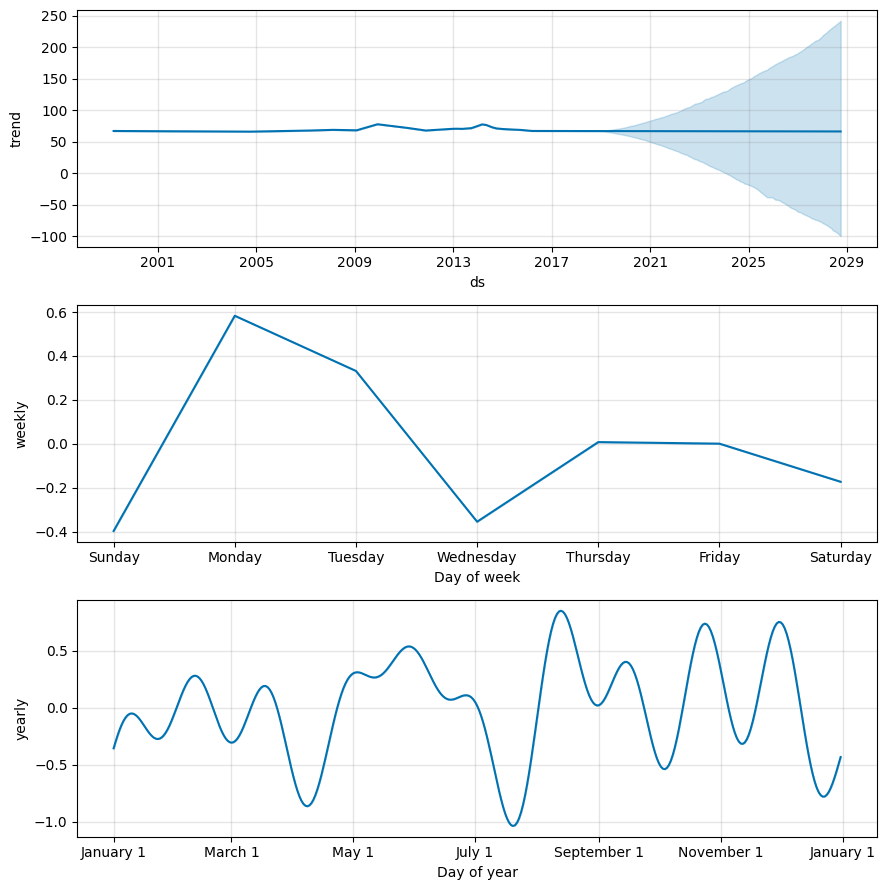

In [267]:
fig2 = model.plot_components(forecast)

# Analysis Completed